In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

在统计学中，我们把从概率分布中抽取样本的过程称为抽样（sampling）。 笼统来说，可以把分布（distribution）看作是对事件的概率分配
将概率分配给一些离散选择的分布称为多项分布（multinomial distribution）。

为了抽取一个样本，即掷骰子，我们只需传入一个概率向量。 输出是另一个相同长度的向量：它在索引 i 处的值是采样结果中 i 出现的次数。

In [8]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 1., 0., 0.])

在估计一个骰子的公平性时，我们希望从同一分布中生成多个样本。 如果用Python的for循环来完成这个任务，速度会慢得惊人。
因此我们使用深度学习框的函数同时抽取多个样本，得到我们想要的任意形状的独立样本数组。

In [10]:
# 它在索引 i 处的值是采样结果中 i 出现的次数。
multinomial.Multinomial(10, fair_probs).sample()

tensor([3., 1., 3., 0., 2., 1.])

现在我们知道如何对骰子进行采样，我们可以模拟1000次投掷。 然后，我们可以统计1000次投掷后，每个数字被投中了多少次。 具体来说，我们计算相对
频率，以作为真实概率的估计。

In [11]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1660, 0.1830, 0.1500, 0.1610, 0.1720, 0.1680])

因为我们是从一个公平的骰子中生成的数据，我们知道每个结果都有真实的概率 16 ， 大约是 0.167 ，所以上面输出的估计值看起来不错。

我们也可以看到这些概率如何随着时间的推移收敛到真实概率。

让我们进行**500组实验,每组抽取10个样本**。

In [18]:
counts = multinomial.Multinomial(10,fair_probs).sample((500,))
counts.shape, counts

(torch.Size([500, 6]),
 tensor([[0., 4., 1., 3., 1., 1.],
         [0., 2., 0., 0., 3., 5.],
         [2., 1., 3., 2., 2., 0.],
         ...,
         [2., 1., 1., 4., 1., 1.],
         [3., 2., 3., 1., 1., 0.],
         [3., 1., 3., 0., 1., 2.]]))

In [19]:
cum_counts = counts.cumsum(dim=0)
cum_counts

tensor([[  0.,   4.,   1.,   3.,   1.,   1.],
        [  0.,   6.,   1.,   3.,   4.,   6.],
        [  2.,   7.,   4.,   5.,   6.,   6.],
        ...,
        [801., 834., 796., 870., 877., 802.],
        [804., 836., 799., 871., 878., 802.],
        [807., 837., 802., 871., 879., 804.]])

In [21]:
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates

tensor([[0.0000, 0.4000, 0.1000, 0.3000, 0.1000, 0.1000],
        [0.0000, 0.3000, 0.0500, 0.1500, 0.2000, 0.3000],
        [0.0667, 0.2333, 0.1333, 0.1667, 0.2000, 0.2000],
        ...,
        [0.1608, 0.1675, 0.1598, 0.1747, 0.1761, 0.1610],
        [0.1611, 0.1675, 0.1601, 0.1745, 0.1760, 0.1607],
        [0.1614, 0.1674, 0.1604, 0.1742, 0.1758, 0.1608]])

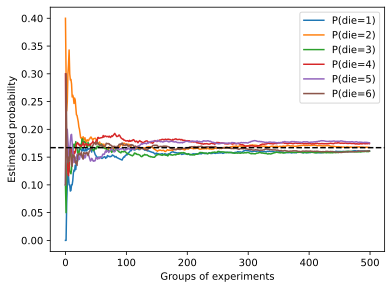

In [27]:
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();
# 每条实线对应于骰子的6个值中的一个，并给出骰子在每组实验后出现值的估计概率。 当我们通过更多的实验获得更多的数据时，这 6 条实体曲线向真实概率收敛。